## Setting up the data

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
GLT_MCity_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\archive\\GlobalLandTemperaturesByMajorCity.csv"
Emmisions_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\data.csv"

In [56]:
GLT = pd.read_csv(GLT_MCity_URL).drop(labels = 'AverageTemperatureUncertainty', axis = 1)
E = pd.read_csv(Emmisions_URL)
E.rename(columns = {'country':'Country', 'year':'Year'}, inplace = True)
GLT.rename(columns = {'dt':'Year'}, inplace = True)
GLT = GLT.dropna() 
GLT['Year'] = GLT['Year'].str[0:4].astype(int)
GLT

,Year,AverageTemperature,City,Country,Latitude,Longitude
0,1849,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...
239171,2013,12.563,Xian,China,34.56N,108.97E
239172,2013,18.979,Xian,China,34.56N,108.97E
239173,2013,23.522,Xian,China,34.56N,108.97E
239174,2013,25.251,Xian,China,34.56N,108.97E


In [57]:
data = E.merge(GLT, on=['Country','Year'])
data.head()

,Country,Year,gdp,cement_co2,co2,coal_co2,gas_co2,methane,nitrous_oxide,oil_co2,AverageTemperature,City,Latitude,Longitude
0,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,3.486,Kabul,34.56N,70.05E
1,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,4.638,Kabul,34.56N,70.05E
2,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,8.620,Kabul,34.56N,70.05E
3,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,13.964,Kabul,34.56N,70.05E
4,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,23.102,Kabul,34.56N,70.05E


In [58]:
#Turning Cardinal DIrections into plus or minus signs
for lat in range(len(data['Latitude'])):
    if data['Latitude'].iloc[lat][-1] == 'N':
        data['Latitude'].iloc[lat] =  str(data['Latitude'].iloc[lat][0:-1])
    else:
        data['Latitude'].iloc[lat] = '-' + str(data['Latitude'].iloc[lat][0:-1])
for long in range(len(data['Longitude'])):
    if data['Longitude'].iloc[long][-1] == 'E':
        data['Longitude'].iloc[long] =  str(data['Longitude'].iloc[long][0:-1])
    else:
        data['Longitude'].iloc[long] = '-' + str(data['Longitude'].iloc[long][0:-1])
data

C:\Users\micha\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Country,Year,gdp,cement_co2,co2,coal_co2,gas_co2,methane,nitrous_oxide,oil_co2,AverageTemperature,City,Latitude,Longitude
0,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,3.486,Kabul,34.56,70.05
1,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,4.638,Kabul,34.56,70.05
2,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,8.620,Kabul,34.56,70.05
3,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,13.964,Kabul,34.56,70.05
4,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,23.102,Kabul,34.56,70.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,20.180,Harare,-18.48,30.42
26699,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,18.298,Harare,-18.48,30.42
26700,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,17.020,Harare,-18.48,30.42
26701,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,16.299,Harare,-18.48,30.42


## Mapping

In [30]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

gensim 4.3.0 requires scipy>=1.7.0, but you'll have scipy 1.5.2 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you'll have numpy 1.19.2 which is incompatible.
pyldavis 3.3.1 requires pandas>=1.2.0, but you'll have pandas 1.1.3 which is incompatible.


  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=39394ee38b590f0dd0c268f7aa0e0be8604b57af7613cd15b65a7ea2af5dbd42
  Stored in directory: c:\users\micha\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2347 sha256=f891ad5bec736b95ecb0b3521e33c562524484b59a02700cb417eaa6c6189e92
  Stored in directory: c:\users\micha\appdata\local\pip\cache\wheels\14\25\f7\1cc0956978ae479e75140219088deb7a36f60459df242b1a72
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20445 sha256=3f7938a4a6e51cadbfc56133457acc683385012122ece8d4f22410da60098d3a
  Stored in directory: c:\users\micha\appdata\local\pip\cache\wheels\6a\65\c4\d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3534 sha256=da2aed09aff907eff4716191c3aa3502393afcf2975b6c25e022297886966

In [34]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

<AxesSubplot:>

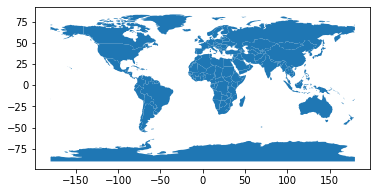

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [59]:
data["Coordinates"] = list(zip(data.Longitude, data.Latitude))
data["Coordinates"] = data["Coordinates"].apply(Point)
data

,Country,Year,gdp,cement_co2,co2,coal_co2,gas_co2,methane,nitrous_oxide,oil_co2,AverageTemperature,City,Latitude,Longitude,Coordinates
0,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,3.486,Kabul,34.56,70.05,POINT (70.05 34.56)
1,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,4.638,Kabul,34.56,70.05,POINT (70.05 34.56)
2,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,8.620,Kabul,34.56,70.05,POINT (70.05 34.56)
3,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,13.964,Kabul,34.56,70.05,POINT (70.05 34.56)
4,Afghanistan,1990,1.306598e+10,0.046,2.024,0.278,0.403,6.74,2.84,1.271,23.102,Kabul,34.56,70.05,POINT (70.05 34.56)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,20.180,Harare,-18.48,30.42,POINT (30.42 -18.48)
26699,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,18.298,Harare,-18.48,30.42,POINT (30.42 -18.48)
26700,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,17.020,Harare,-18.48,30.42,POINT (30.42 -18.48)
26701,Zimbabwe,2013,2.112350e+10,0.463,11.671,7.104,0.000,12.45,5.62,4.104,16.299,Harare,-18.48,30.42,POINT (30.42 -18.48)


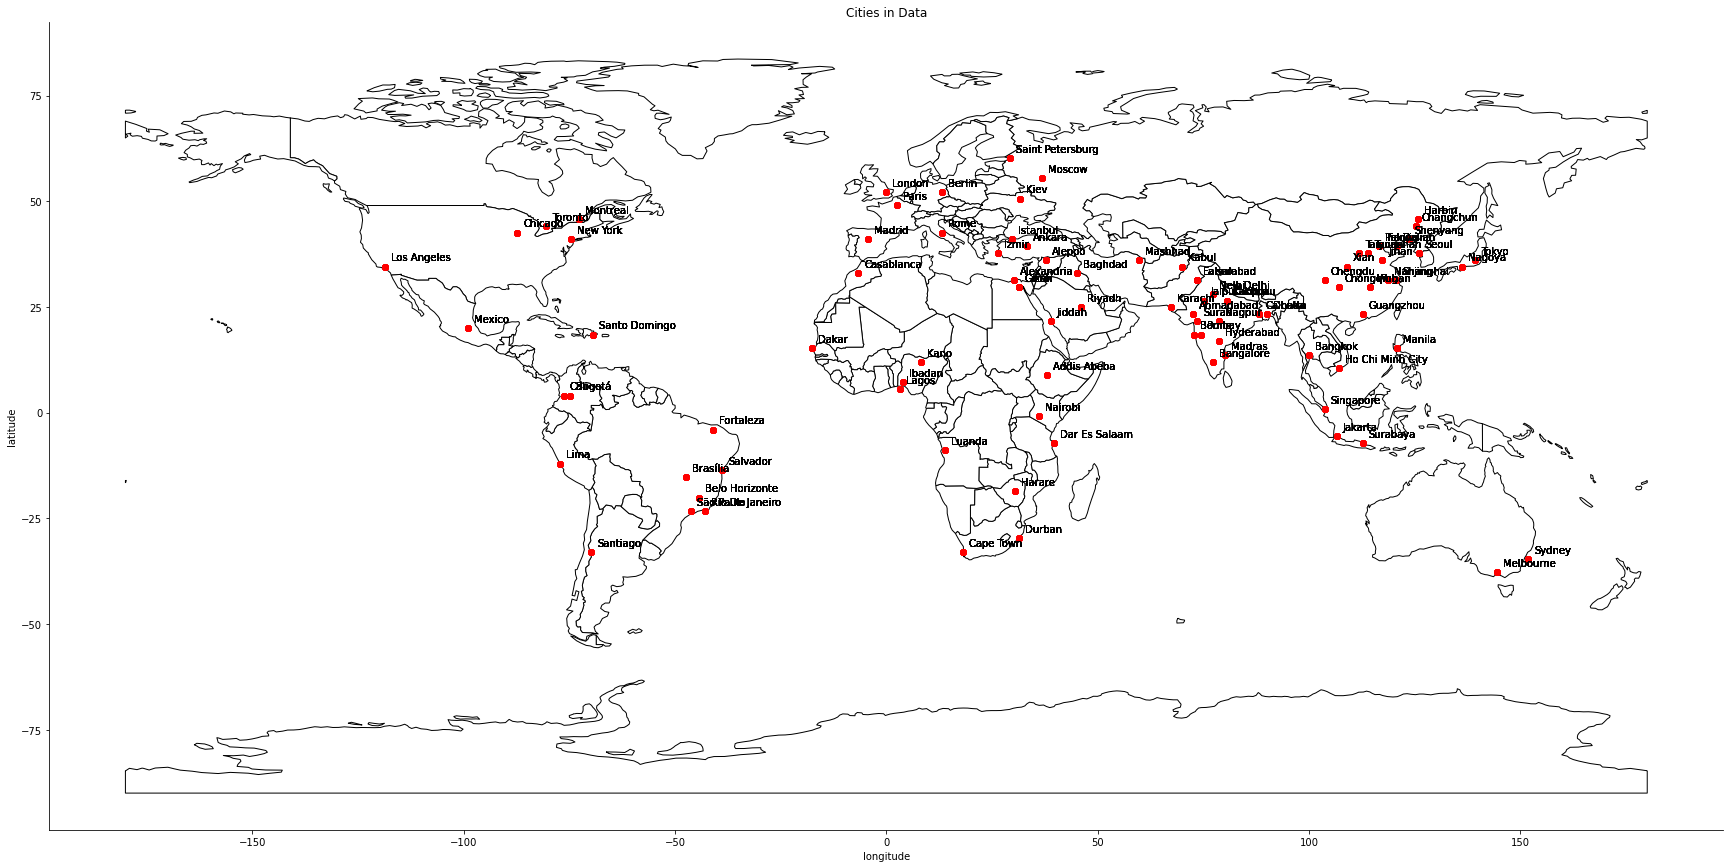

In [61]:
fig, gax = plt.subplots(figsize=(30,30))
world.plot(ax = gax, edgecolor='black', color='white')
mp = gpd.GeoDataFrame(data[data['Year'] == 2000], geometry="Coordinates")
mp['Coordinates'].plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cities in Data')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Label the cities
for x, y, label in zip(mp['Coordinates'].x, mp['Coordinates'].y, mp['City']):
    gax.annotate(label, xy=(x,y), xytext=(6,6), textcoords='offset points')

plt.show()